In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize


In [3]:
smsdata = pd.read_csv("smsspamcollection/SMSSpamCollection", sep='\t', names=['label', 'message'])
smsdata

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
x = smsdata["message"]
y = smsdata["label"]
y

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: label, Length: 5572, dtype: object

In [5]:
x = x.apply(word_tokenize)
x

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568      [Will, ü, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: message, Length: 5572, dtype: object

In [6]:
import re

In [7]:
x = x.apply(lambda z: [re.sub('[^A-Za-z0-9]+', '', i) for i in z])
x

0       [Go, until, jurong, point, , crazy, , Availabl...
1                      [Ok, lar, , Joking, wif, u, oni, ]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, , U, c, already,...
4       [Nah, I, do, nt, think, he, goes, to, usf, , h...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568        [Will, , b, going, to, esplanade, fr, home, ]
5569    [Pity, , , was, in, mood, for, that, , So, , a...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                   [Rofl, , Its, true, to, its, name]
Name: message, Length: 5572, dtype: object

In [8]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))


In [9]:
x = x.apply(lambda z: [i for i in z if i.lower() not in stop_words])
x

0       [Go, jurong, point, , crazy, , Available, bugi...
1                      [Ok, lar, , Joking, wif, u, oni, ]
2       [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3       [U, dun, say, early, hor, , U, c, already, say, ]
4       [Nah, nt, think, goes, usf, , lives, around, t...
                              ...                        
5567    [2nd, time, tried, 2, contact, u, U, 750, Poun...
5568                  [, b, going, esplanade, fr, home, ]
5569                  [Pity, , , mood, , , suggestions, ]
5570    [guy, bitching, acted, like, interested, buyin...
5571                                 [Rofl, , true, name]
Name: message, Length: 5572, dtype: object

In [10]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
x = x.apply(lambda z: [stemmer.stem(i) for i in z])
x

0       [go, jurong, point, , crazi, , avail, bugi, n,...
1                        [ok, lar, , joke, wif, u, oni, ]
2       [free, entri, 2, wkli, comp, win, fa, cup, fin...
3       [u, dun, say, earli, hor, , u, c, alreadi, say, ]
4       [nah, nt, think, goe, usf, , live, around, tho...
                              ...                        
5567    [2nd, time, tri, 2, contact, u, u, 750, pound,...
5568                      [, b, go, esplanad, fr, home, ]
5569                      [piti, , , mood, , , suggest, ]
5570    [guy, bitch, act, like, interest, buy, someth,...
5571                                 [rofl, , true, name]
Name: message, Length: 5572, dtype: object

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

In [12]:
doc_matrix = vectorizer.fit_transform(x.apply(" ".join))
doc_matrix

<5572x7649 sparse matrix of type '<class 'numpy.int64'>'
	with 46840 stored elements in Compressed Sparse Row format>

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix


In [14]:
x_train, x_test, y_train, y_test = train_test_split(doc_matrix, y, test_size=0.25, random_state=420)
x_train.shape

(4179, 7649)

In [15]:
nb = MultinomialNB()
nb.fit(x_train, y_train)

MultinomialNB()

In [16]:
pred = nb.predict(x_test)
pred

array(['spam', 'spam', 'spam', ..., 'spam', 'ham', 'spam'], dtype='<U4')

In [17]:
cmatrix = confusion_matrix(y_test, pred, labels=['ham', 'spam'])
cmatrix

array([[1177,   19],
       [  12,  185]], dtype=int64)

In [18]:
accuracy = confusion_matrix(y_test,pred,labels=['ham', 'spam']).diagonal().sum() / len(y_test)
accuracy

0.9777458722182341

d:\Program Files(D)\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


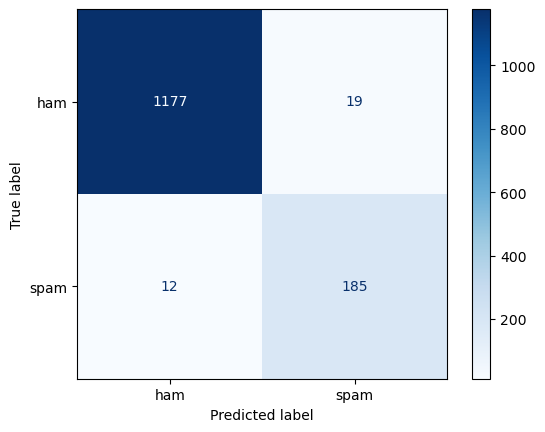

In [19]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(nb, x_test, y_test, display_labels=['ham', 'spam'], cmap='Blues')

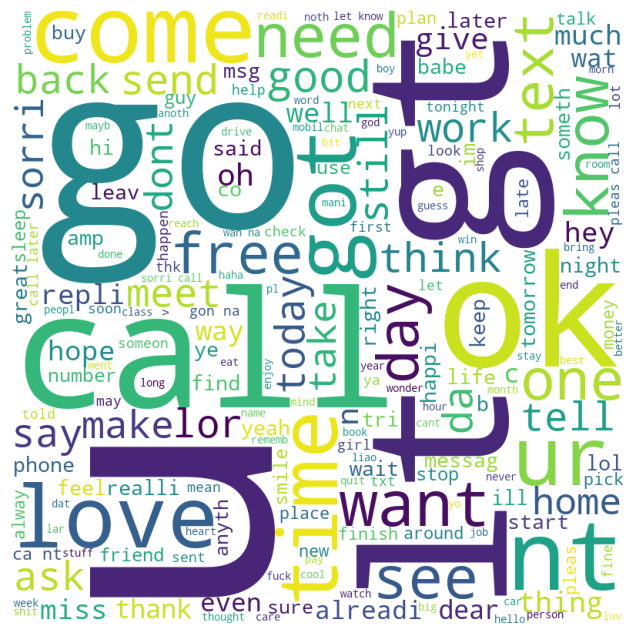

In [20]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
text = ' '.join(x.apply(' '.join))
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(text)

# Plot the wordcloud
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()